# Project 2
# Predictive Modeling from Lending Club
## EDA

Lending club currently gives a loan a grade and sub-grade. Each grade has a range of interest level associated with it. Are these grades predictive of default (classification) or the remaining outstanding principal for portion of total amount funded by investors (regression) if a loan does default? Can we make a better model of whether or not a loanee will default? Furthermore, if a loanee does default can we predict how much the investors will be out? If there is a high probability that a loanee defaults, investors may still make a profit with a high enough interest rate. Our job is to model creditworthiness by predicting who will default and model good vs. bad investments by predicting the amount investors will be out.

The first step here is to perform an EDA on the dataset.

* 1 Data Import
    * 1.1 Missing Columns
    * 1.2 Missing Data 
* 2 Feature Transformation & Engineering
    * 2.1 emp_length
    * 2.2 term
    * 2.3 categorical datatypes
        * 2.3.1 categorical columns - keep
        * 2.3.2 categorical columns - drop
    * 2.4 date columns
        * 2.4.1 date columns - keep
        * 2.4.2. date columns - drop 
    * 2.5 loan status
    * 2.6 issue_d
    * 2.7 inq_last_6mths
    * 2.8 pub_rec
    * 2.9 funded_amnt
* 3 Data Exploration
    * 3.1 loan amount
    * 3.2 default vs non-default loans
    * 3.3 issue date
    * 3.4 terms
    * 3.5 grade
    * 3.6 interest rates
    * 3.7 home ownership
    * 3.8 purpose
    * 3.9 state
* 4 Correlation
* 5 Export

In [115]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os

import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
#plt.style.use('fivethirtyeight')

## 1. Data Import

In [2]:
# import our lending club data
#
# Note: I'm using the 'low_memory=False' flag to silence a memory warning.  We could specify 
# the dtypes of columns to lower the memory consumption.  The provided csv file is
# not too large, so I am fine with simply silencing the error in this particular case. 

# create the path to the data
path = '../data/raw/'

# list our file names
loan_stat_files = ['LoanStats3a.csv',
             'LoanStats3b.csv',
             'LoanStats3c.csv',
             'LoanStats3d.csv',
             'LoanStats_2016Q1.csv',
             'LoanStats_2016Q2.csv',
             'LoanStats_2016Q3.csv',
             'LoanStats_2016Q4.csv',
             'LoanStats_2017Q1.csv',
             'LoanStats_2017Q2.csv',
             'LoanStats_2017Q3.csv'
            ]

dfs=[]
for f in loan_stat_files:
    df_temp = pd.read_csv(os.path.join(path, f), low_memory=False)
    dfs.append(df_temp)

df = pd.concat(dfs) 

In [3]:
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697532 entries, 0 to 65498
Data columns (total 144 columns):
member_id                                     0 non-null float64
loan_amnt                                     697525 non-null float64
funded_amnt                                   697525 non-null float64
funded_amnt_inv                               697525 non-null float64
term                                          697525 non-null object
int_rate                                      697525 non-null object
installment                                   697525 non-null float64
grade                                         697525 non-null object
sub_grade                                     697525 non-null object
emp_title                                     652154 non-null object
emp_length                                    655261 non-null object
home_ownership                                697525 non-null object
annual_inc                                    697521 non-null

# 1.1 Missing Columns
Lending club has provided us with an Excel file containing an explanation of each column.  It appears that the number columns in the Excel file differs from the data provided in our CSV.  Let's take a closer look.

In [4]:
# read data from excel file (which explains all column types)
excel_desc = pd.read_excel('../data/raw/LCDataDictionary.xlsx')

In [5]:
excel_desc

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [6]:
# columns 151 & 152 are notes.  Let's remove them.
excel_desc.drop(excel_desc.index[[151, 152]], inplace=True)

In [7]:
# Build a set containing column names for both datasets
excel_col_set = set(excel_desc.LoanStatNew)
csv_col_set = set(df.columns)

# indentify differences from the Excel & CSV files
excel_col_set - csv_col_set


{'fico_range_high',
 'fico_range_low',
 'id',
 'last_fico_range_high',
 'last_fico_range_low',
 'revol_bal_joint ',
 'sec_app_chargeoff_within_12_mths ',
 'sec_app_collections_12_mths_ex_med ',
 'sec_app_earliest_cr_line ',
 'sec_app_fico_range_high ',
 'sec_app_fico_range_low ',
 'sec_app_inq_last_6mths ',
 'sec_app_mort_acc ',
 'sec_app_mths_since_last_major_derog ',
 'sec_app_num_rev_accts ',
 'sec_app_open_acc ',
 'sec_app_revol_util ',
 'total_rev_hi_lim \xa0',
 'verified_status_joint'}

It appears that we are missing a total of 19 columns as described by the excel file.  We will continue on without these columns.

### 1.2 Missing Data
Reviewing the output from the .info() command, we can see that several columns have a severe amount of data missing.  We could take two routes here:

1. We could impute the missing data.  The problem here is that when imputing large amounts of missing data we tend to introduce bias and decrease the overall variance.
2. We could simply remove columns missing large amounts of data. 

I have selected to go with option 2 for data columns which are missing more than 10% of data.  As you can see below, some columns are missing over 10% of data.  Imputing this amount of data does not make sense.  

In [8]:
from operator import itemgetter

# create a dictionary to hold the column name & missing data percentage
cols = {}

# loop through each column and find the percentage of missing data
for c in df.columns:
    cols[c] = df[c].isnull().sum() / len(df) * 100

# Our missing data threshold is set to 10%
data_threshold = 10
del_cols = []

# loop through columns and only keep those that are missing 10% of data
for k, v in sorted(cols.items(), key=itemgetter(1), reverse=True):
    if cols[k] > data_threshold:
        print('{0}: {1:.2f}'.format(k, cols[k]))
        del_cols.append(k)

member_id: 100.00
url: 100.00
orig_projected_additional_accrued_interest: 99.71
hardship_type: 99.68
hardship_reason: 99.68
hardship_status: 99.68
deferral_term: 99.68
hardship_amount: 99.68
hardship_start_date: 99.68
hardship_end_date: 99.68
payment_plan_start_date: 99.68
hardship_length: 99.68
hardship_dpd: 99.68
hardship_loan_status: 99.68
hardship_payoff_balance_amount: 99.68
hardship_last_payment_amount: 99.68
debt_settlement_flag_date: 99.54
settlement_status: 99.54
settlement_date: 99.54
settlement_amount: 99.54
settlement_percentage: 99.54
settlement_term: 99.54
sec_app_mths_since_last_major_derog: 99.30
sec_app_revol_util: 98.00
revol_bal_joint: 97.98
sec_app_earliest_cr_line: 97.98
sec_app_inq_last_6mths: 97.98
sec_app_mort_acc: 97.98
sec_app_open_acc: 97.98
sec_app_open_act_il: 97.98
sec_app_num_rev_accts: 97.98
sec_app_chargeoff_within_12_mths: 97.98
sec_app_collections_12_mths_ex_med: 97.98
dti_joint: 96.83
annual_inc_joint: 96.83
verification_status_joint: 96.83
desc: 92.

In [9]:
# drop columns that are greater than 10%
df.drop(del_cols, inplace=True,axis=1)

We've removed a total of 59 columns due to missing data concerns.  

## 2. Feature Transformation & Feature Engineering
Let's take a look at features that have mixed types that need to be reclassified.

### 2.1 term
At the moment, term is represented by a string.  We want to cut the 'months' from the column to leave just a number of months

In [10]:
# Look at values
df.term.value_counts()

36 months    508969
60 months    188556
Name: term, dtype: int64

In [11]:
# we have NA values - let's drop these rows since it's only a very few rows.
df = df.dropna(subset=['term'], axis=0, how='any')

In [12]:
# convert to an integer
df['term'] = [t[:2] for t in df.term]
df['term'] = df.term.astype(int)

### 2.2 int_rate
Interest rate currently has a percentage symbol - we want to remove this symbol and make it a float value

In [13]:
# change interest rate from string to float
int_rate_temp = [i[:-1] for i in df.int_rate]
df['int_rate'] = pd.to_numeric(int_rate_temp, errors='coerce')

### 2.3 emp_length
emp_length tracks the number of employment years for the given borrower.  It appears that employment years range from 0 to 10+ years.  We also have 'n/a', meaning the number of years of employment is not available. 

We will transform this data into an integer that represents the number of employment years
* '0' represents less than 1 year of employment.  
* '10' will represent 10 or more years of experience. 
* for the sake of this model, we will impute 'n/a' into the mean # of years for the column. 

In [14]:
df.emp_length.value_counts()

10+ years    231228
2 years       63742
< 1 year      59062
3 years       56731
1 year        46154
5 years       43124
4 years       42090
6 years       31441
8 years       28490
7 years       27203
9 years       25996
Name: emp_length, dtype: int64

In [15]:
# first replace the n/a with np.nan - this will allow us to convert the column from 'object' to 'int'
df.emp_length.replace('n/a', np.nan, inplace=True)

In [16]:
# Let's transform this into a 0-10 range
emp_length_fixed = []

for length in df.emp_length:
    if length == '< 1 year':
        emp_length_fixed.append(0)
    elif length == '1 year':
        emp_length_fixed.append(1)
    elif length == '2 years':
        emp_length_fixed.append(2)
    elif length == '3 years':
        emp_length_fixed.append(3)
    elif length == '4 years':
        emp_length_fixed.append(4)
    elif length == '5 years':
        emp_length_fixed.append(5)
    elif length == '6 years':
        emp_length_fixed.append(6)
    elif length == '7 years':
        emp_length_fixed.append(7)
    elif length == '8 years':
        emp_length_fixed.append(8)
    elif length == '9 years':
        emp_length_fixed.append(9)
    elif length == '10+ years':
        emp_length_fixed.append(10)
    else:
        emp_length_fixed.append(length)

df['emp_length'] = emp_length_fixed

In [17]:
# we can now replace np.nan with the mean of the column
df.emp_length.replace(np.nan, df.emp_length.mean(), inplace=True)

# let's convert the column from a float into an integer
df['emp_length'] = df.emp_length.astype(int)

In [18]:
df.emp_length.value_counts()

10    231228
5      85388
2      63742
0      59062
3      56731
1      46154
4      42090
6      31441
8      28490
7      27203
9      25996
Name: emp_length, dtype: int64

### 2.4 emp_title
The employment title contains a free form text.  It is hard to match title names as some have lower case, some have upper case, and others lie somewhere in between.  

To fix this - we will convert the entire column to lower case. "

In [19]:
# Lets have a look at what type of data we are dealing with
df.emp_title.head(20)

0                                     NaN
1                                   Ryder
2                                     NaN
3                     AIR RESOURCES BOARD
4                University Medical Group
5                    Veolia Transportaton
6               Southern Star Photography
7                         MKC Accounting 
8                                     NaN
9                               Starbucks
10                  Southwest Rural metro
11                                   UCLA
12    Va. Dept of Conservation/Recreation
13                                 Target
14                                  SFMTA
15               Internal revenue Service
16                      Chin's Restaurant
17                               Duracell
18                  Connection Inspection
19           Network Interpreting Service
Name: emp_title, dtype: object

In [20]:
# convert titles to lowercase
df['emp_title'] = [t.lower() if type(t) is str else t for t in df.emp_title]

Next, we look at the value counts for each title - which employment titles are most popular?

In [21]:
# create a new data frame with the title counts
df_titles = df.emp_title.value_counts().to_frame()

# rename columns
df_titles.index.name = 'title'
df_titles.columns = ['freq']

In [22]:
# how many unique titles do we have? 
len(df_titles)

180719

This an enormous amount of unique titles - let's cut this down by only focusing on job titles that occur 100 or more times.  Let's also produce a new column that contains the likelihood that each of these job titles will have a default loan.

In [23]:
# look at titles that occur more than 100 times
df_titles = df_titles[df_titles.freq >= 100]

In [24]:
# create a filter that identifies loan status' which are 'bad'
searchfor = ['Charged Off', 
             'Default', 
             'Does not meet the credit policy. Status:Charged Off', 
             'Late (16-30 days)', 'Late (31-120 days)']

In [25]:
# create a new column that identifies how many bad loans each job title contains
df_titles['default_percentage'] = [np.sum((df.emp_title==j) & (df.loan_status.str.contains('|'.join(searchfor)))) / df_titles.loc[j].freq for j in df_titles.index]


//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


In [26]:
# What titles have the worse default percentage? 
df_titles.sort_values('default_percentage', ascending=False)

,freq,default_percentage
title,,
walmart,148,0.222973
ups,113,0.221239
at&t,137,0.204380
ibm,100,0.160000
bank of america,234,0.158120
us army,319,0.153605
usps,140,0.150000
wells fargo,111,0.144144
stocker,154,0.136364


It's interesting to note that there appears to be a trend around employment titles that have bad default percentage.

For example the following employment titles appear in several different forms, but all have poor default percentage.
* US postal Service
* Walmart
* Target
* Version 

In order to classify this data, we will create a new column named 'low_deliquences_jobs':
* 1 identifies frequent employment titles having less than 5% default percentage
* 0 identifies all other employmen titles

In [27]:
low_deliquences_jobs = df_titles[df_titles.default_percentage < 0.05].index

df['low_deliquent_job'] = [1 if j in low_deliquences_jobs else 0 for j in df.emp_title]

In [28]:
# we've created a new column for our job titles that perform well - let's now drop the emp_title column
df.drop('emp_title', axis=1, inplace=True)

### 2.5 revol_util
revol_util relates to the amount of credit the borrower is usuing relative to all available revolving credit.  This can be used as a key indicator for bad loans. At the moment, it contains a percentage symbol - which needs to be removed. 

In [29]:
# first, get rid of any missing values
df = df.dropna(subset=['revol_util'], axis=0, how='any')

In [30]:
df['revol_util'] = [e[:-1] for e in df.revol_util]
df['revol_util'] = df.revol_util.astype(float)

## 2.5 earliest_cr_line

earliest_cr_line relates to month/year in which the borrow first opened a credit line.  

we can create a new feature here to capture the length in which a borrower has had credit - before dropping the original field

In [31]:
df.earliest_cr_line.value_counts().head()

Sep-2003    4923
Sep-2004    4829
Aug-2003    4725
Oct-2003    4630
Sep-2002    4601
Name: earliest_cr_line, dtype: int64

In [32]:
# convert to a date field
df['earliest_cr_line'] = pd.to_datetime(df.earliest_cr_line)

In [33]:
# calculate the length of credit line in months
df['credit_line_length_mnths'] = (pd.to_datetime('today') - df.earliest_cr_line) / np.timedelta64(1, 'M')

In [34]:
# drop column
df.drop('earliest_cr_line', axis=1, inplace=True)

### 2.5 loan status
We have several loan statuses - but we want to convert the status into a binary non-default/default representation. 

In [35]:
for s in df.loan_status.unique():
    print(s)

Fully Paid
Charged Off
Does not meet the credit policy. Status:Fully Paid
Does not meet the credit policy. Status:Charged Off
Current
Late (16-30 days)
Late (31-120 days)
In Grace Period
Default
Issued


In [36]:
# Group status into good vs bad status
good = [
    'Current',
    'Fully Paid',
    'Issued',
    'Does not meet the credit policy. Status:Fully Paid'
    'In Grace Period'
]
                    
bad = [
    'Charged Off',
    'Default',
    'Does not meet the credit policy. Status:Charged Off',
    'Late (16-30 days)',
    'Late (31-120 days)',
]


In [37]:
# convert into a new column
df['is_bad'] = [1 if s in bad else 0 for s in df.loan_status]

In [38]:
df[['loan_status', 'is_bad']].head(15)

,loan_status,is_bad
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
4,Fully Paid,0
5,Fully Paid,0
6,Fully Paid,0
7,Fully Paid,0
8,Charged Off,1
9,Charged Off,1


### 2.7 inq_last_6mnths
The column related to credit inquires in the last 6 months denotes whether this borrower has requested a credit check in the last 6 months.  A value here can identify that the borrower has attempted to get additional credit before requesting this loan - which could identify that they are stuggling to get a loan based on prior activities. 

We are going to catogrize this column to simply identify whether or not they have requested a credit check. 

Based on the data - we see that the data is heavily skewed with the majority of borrowers having 0 or 1 credit checks.  Credit checks are required for various neccessities in life (e.g. renting an apartment), we will say less that 2 credit checks is classified as 'no'.  Everything 2 and above we will consider as 'yes'.

In [39]:
df.inq_last_6mths.value_counts()

0.0     418802
1.0     183175
2.0      63164
3.0      21921
4.0       6597
5.0       2407
6.0        490
7.0        181
8.0        115
9.0         50
10.0        24
11.0        15
12.0        15
15.0         9
14.0         6
13.0         6
18.0         4
16.0         3
17.0         2
19.0         2
24.0         2
31.0         1
32.0         1
25.0         1
28.0         1
20.0         1
33.0         1
27.0         1
Name: inq_last_6mths, dtype: int64

In [40]:
df['inq_last_6mths_cat'] = [1 if c <= 2 else 0 for c in df.inq_last_6mths]

In [41]:
df.inq_last_6mths_cat.value_counts()

1    665141
0     31856
Name: inq_last_6mths_cat, dtype: int64

In [42]:
# let's remove the inq_last_6mths column
df.drop('inq_last_6mths', axis=1, inplace=True)

## 2.8 pub_rec
pub_rec represents the number of derogatory public records for the borrower.  Similiarly to inquiries of credit checks in the last 6 months, the data is heavily skewed with the majority of data falling in 0 derogatory records.  We will categorize this value as well to simply identify whether or not the borrower 'has' or 'has not' had a derogatory public record.

In [43]:
df.pub_rec.value_counts()

0.0     578234
1.0      97845
2.0      13499
3.0       4220
4.0       1607
5.0        747
6.0        384
7.0        173
8.0         95
9.0         54
10.0        41
11.0        33
12.0        17
13.0        10
14.0         6
15.0         5
19.0         5
16.0         5
17.0         3
28.0         3
20.0         2
31.0         1
18.0         1
49.0         1
47.0         1
46.0         1
21.0         1
23.0         1
26.0         1
24.0         1
Name: pub_rec, dtype: int64

In [44]:
df['pub_rec_cat'] = [1 if p > 0 else 0 for p in df.pub_rec]

In [45]:
df.pub_rec_cat.value_counts()


0    578234
1    118763
Name: pub_rec_cat, dtype: int64

In [46]:
# let's remove the pub_rec column
df.drop('pub_rec', axis=1, inplace=True)

### 2.9 funded_amnt
funded_amnt represents how much money the borrower receives.  This could be less than the requested loan amount, which might identify that a borrower is not trustworthy on repayment.  We will create a new category to indentify loans which are not fully funded.

In [47]:
# create new column for fully_funded
df['fully_funded'] = [1 if x == 0 else 0 for x in df.loan_amnt - df.funded_amnt]

In [48]:
df.fully_funded.value_counts()

1    694997
0      2000
Name: fully_funded, dtype: int64

### 2.10 Categorical Datatypes
We have several 'object' type columns, some of which we will keep and convert into categorical datatypes, and others that we will drop.  Let's have a look.

In [49]:
# List the number of columns which are of type 'object'
df.select_dtypes(include=['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

There is a mixture of categorical and date columns in the above list.  We will only focus on categorical datatypes in this section.  I've separated out the columns into two groupings:
* cat_cols_keep
* cat_cols_drop

These two groupings are processed in the subsections below.

In [50]:
cat_cols_keep = ['grade',
            'sub_grade', 
            'home_ownership', 
            'verification_status',
            'loan_status',
            'purpose',
            'addr_state',
            'initial_list_status',
            'zip_code',
            'hardship_flag',
            'application_type']

cat_cols_drop = ['title',
                 'pymnt_plan',
                 'disbursement_method',
                 'debt_settlement_flag']

### 2.10.1 Categorical Columns - Keep

In [51]:
# convert each column to type 'category'
for col in cat_cols_keep:
    df[col] = pd.Categorical(df[col])

In [52]:
# validate that columns are now of type category
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696997 entries, 0 to 65498
Data columns (total 87 columns):
loan_amnt                     696997 non-null float64
funded_amnt                   696997 non-null float64
funded_amnt_inv               696997 non-null float64
term                          696997 non-null int64
int_rate                      696997 non-null float64
installment                   696997 non-null float64
grade                         696997 non-null category
sub_grade                     696997 non-null category
emp_length                    696997 non-null int64
home_ownership                696997 non-null category
annual_inc                    696997 non-null float64
verification_status           696997 non-null category
issue_d                       696997 non-null object
loan_status                   696997 non-null category
pymnt_plan                    696997 non-null object
purpose                       696997 non-null category
title                     

### 2.10.2 Categorical Columns - Drop
I've decided to drop several categorical columns after reviewing the data and determined that they are not of value for this specific analysis.  I've addressed the contents of each column below, prior to dropping the columns from the dataframe. 

In [53]:
# title is a free form text supplied by the borrower, representing the reason why the borrower wants the
# loan.  The information contained within this column is summarized clearly within the 'purpose' column
# We will drop the title column, and keep the purpose column for classification
df.title.value_counts().head(15)

Debt consolidation         339156
Credit card refinancing    125378
Home improvement            42532
Other                       38602
Major purchase              13876
Medical expenses             7813
Debt Consolidation           6467
Business                     6447
Car financing                6405
Vacation                     4726
Moving and relocation        4398
Home buying                  2676
Consolidation                2293
Debt Consolidation Loan      2236
debt consolidation           1959
Name: title, dtype: int64

In [54]:
# pymnt_plan has an extremely small variance within the data - thus we will drop it
df.pymnt_plan.value_counts()

n    695467
y      1530
Name: pymnt_plan, dtype: int64

In [55]:
# Calculate the variance of the pymnt_plan column - notice how small it is
np.var(df.pymnt_plan.map({'y':1, 'n':0}))

0.0021903127975424308

In [56]:
# disbursement_method has an extremely small variance within the data - thus we will drop it
df.disbursement_method.value_counts()

Cash         695301
DirectPay      1696
Name: disbursement_method, dtype: int64

In [57]:
# calculate the variance of disbursement_method
np.var(df.disbursement_method.map({'Cash':1, 'DirectPay':0}))

0.0024273750533246752

In [58]:
# debt_settlement_flag has an extremely small variance within the data - thus we will drop it
df.debt_settlement_flag.value_counts()

N    693805
Y      3192
Name: debt_settlement_flag, dtype: int64

In [59]:
# Calculate the variance of debt_settlement - notice how small it is
np.var(df.debt_settlement_flag.map({'Y':1, 'N':0}))

0.004558673520581696

In [60]:
# remove the above columns as they do not serve any purpose for our model
df.drop(cat_cols_drop, axis=1, inplace=True)

### 2.11 date columns
Similarily to categorical columns, we have several 'object' type columns that can be converted to date datatypes, and other columns that we will drop. Let's have a look.

In [61]:
# List the number of columns which are of type 'object'
df.select_dtypes(include=['object']).columns

Index(['issue_d', 'last_pymnt_d', 'last_credit_pull_d'], dtype='object')

We will only focus on date datatypes in this section.  I've separated out the columns into two groupings:
* date_cols_keep
* date_cols_drop

These two groupings are processed in the subsections below.

In [62]:
date_cols_keep = ['issue_d']

date_cols_drop = ['last_pymnt_d',
                 'last_credit_pull_d']

### 2.4.1 date columns - keep

In [63]:
# convert each column to date
for col in date_cols_keep:
    df[col] = pd.to_datetime(df[col])

We will also create 2 new columns from the issue date field to indentify the month & year the loan was issued

In [64]:
# create new columns
df['issue_d_month'] = df.issue_d.dt.month
df['issue_d_year'] = df.issue_d.dt.year

### 2.4.2 date columns - drop
I've decided to drop several date columns after reviewing the data and determined that they are not of value for this specific analysis.  I've addressed the contents of each column below, prior to dropping the columns from the dataframe. 

In [65]:
# last_pymnt_d relates to repayment - I do not see any use for this at this time.  If a loan is late, 
# the loan status will represent this 
df.last_pymnt_d.value_counts().head()

Oct-2017    416716
Sep-2017     15969
Nov-2017     13451
Aug-2017     12377
Jul-2017     11163
Name: last_pymnt_d, dtype: int64

In [66]:
# relates to the last time a credit report was pulled - I do not see any use for this at this time
df.last_credit_pull_d.value_counts().head()

Oct-2017    523849
Sep-2017     22149
Oct-2016     18919
Aug-2017     16385
Jul-2017     10929
Name: last_credit_pull_d, dtype: int64

In [67]:
# drop columns
df.drop(date_cols_drop,axis=1, inplace=True)

## 3. Data Exploration

### 3.1 Explore Loan Amount

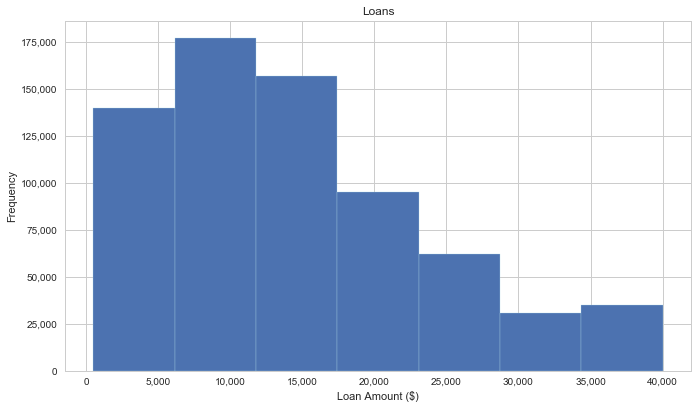

In [116]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter

fig, ax = plt.subplots(figsize=(10,6))

# create histogram of loan amounts
df.loan_amnt.hist(bins=7, edgecolor='lightblue')

# setup titles
plt.title('Loans')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')

# setup labels
ax = plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

fig.savefig('../reports/figures/loan_amnt_hist.png')

plt.show()

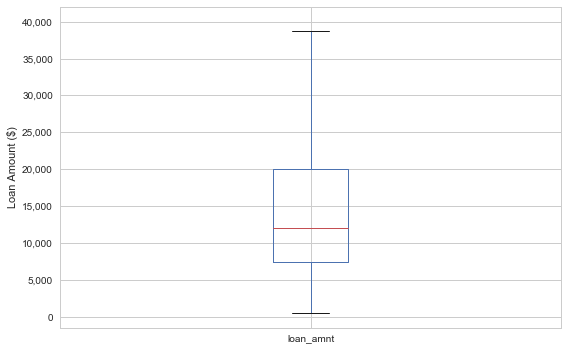

In [117]:
# let's see the statistics for these loans
df.loan_amnt.plot(kind='box')

# setup titles
plt.ylabel('Loan Amount ($)')

# setup labels
ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

In [118]:
df.loan_amnt.describe()

count    696997.000000
mean      14445.670319
std        8948.600919
min         500.000000
25%        7500.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

It appears that loans within the 7,500 - 20,000 range are most popular. Let's look at loans by status - 

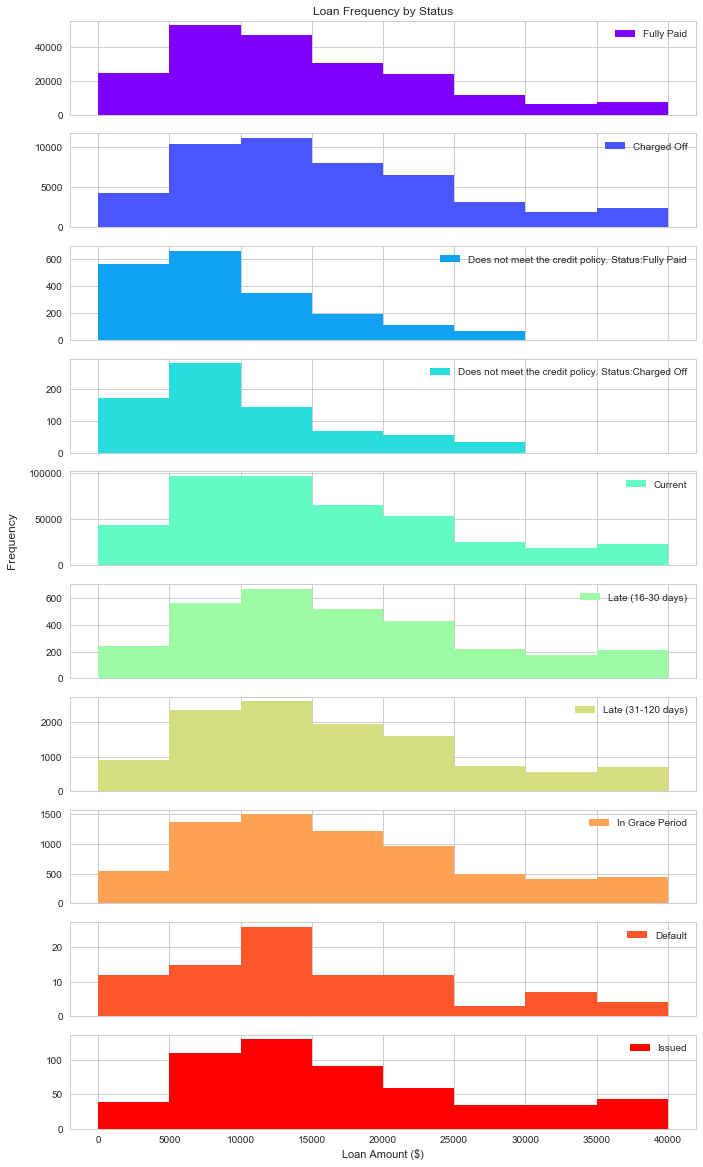

In [119]:
# what do we look like for loan amounts per grade? I've removed the 'sharey' attribute since many
# of the status' have very few values compared to the overall frequency

status = df.loan_status.unique()

fig, axs = plt.subplots(len(status), sharex=True,figsize=(10,19))

# create bins
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]

# create a colormap to represent each loan status
cm = plt.cm.rainbow
colors = cm(np.linspace(0, 1, len(status)))

for i, l in enumerate(status):
    line = axs[i].hist(df[df.loan_status==l].loan_amnt, bins=bins, color=colors[i], label=l)
    axs[i].legend()

# Set labels
axs[0].set_title('Loan Frequency by Status')
plt.xlabel('Loan Amount ($)')
fig.text(0., 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

fig.savefig('../reports/figures/loan_amnt_hist_by_status.png')
plt.show()

In [358]:
# what percentages does each loan status represent? 
dic = {}
for s in status:
    dic[s] = format(len(df[df.loan_status==s]) / len(df), '.3f')

for (status, per) in sorted(dic.items(), key= lambda x: x[1], reverse=True):
    print('{}: {}'.format(status, per))

Current: 0.604
Fully Paid: 0.291
Charged Off: 0.069
Late (31-120 days): 0.016
In Grace Period: 0.010
Late (16-30 days): 0.004
Does not meet the credit policy. Status:Fully Paid: 0.003
Does not meet the credit policy. Status:Charged Off: 0.001
Issued: 0.001
Default: 0.000


**Summary**

Nothing too extrodainary here in the loan amounts.  We see:
* About 90% of loans are in the Current/Fully Paid statuses, meaning we are generally doing well with loans overall!
* Loans range from $500 - $40,000, with the average loan being $14,755.
* Loans in a chraged off/default/grace period/late status tend to have a higher mean than those in a current/fully 

### 3.2 Explore Default vs Non-Default Loans
Do bad loans appear more frequently in higher loan amounts? 

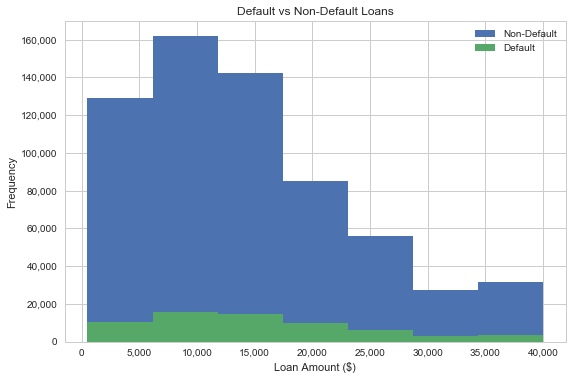

In [120]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

# can we say anything about loan amounts being related to whether they are good or bad? 
df.groupby('is_bad').loan_amnt.plot.hist(bins=7)

# update titles
plt.title('Default vs Non-Default Loans')
plt.xlabel('Loan Amount ($)')

# setup labels
ax = plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# create legend
leg_legend = ['Non-Default', 'Default']
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, leg_legend)

fig.savefig('../reports/figures/loan_amnt_hist_defaultvsnondefault.png')

plt.show()

**Summary**

* The majority of loans appear to be non-default.
* Percentage wise, we don't see any significance trends between the loan amounts & default status

### 3.3 Explore Issue Date
Are there any trends in the loans over time? 

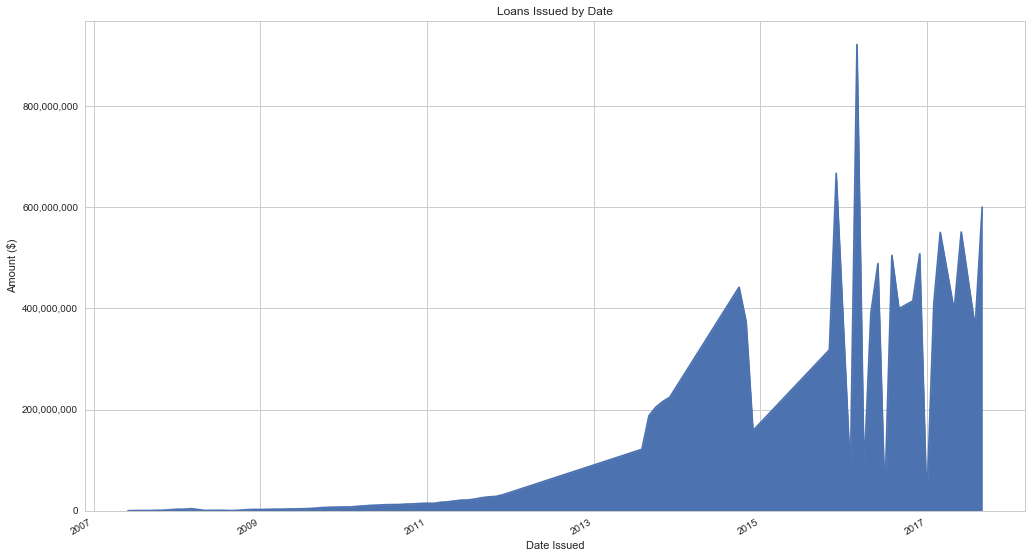

In [121]:
# grab figure
fig, ax = plt.subplots()

# group by date, and summarize by loan ammount, then plot
df.groupby('issue_d').loan_amnt.sum().plot.area(figsize=(15,10))

# set labels
plt.title('Loans Issued by Date')
plt.ylabel('Amount ($)')
plt.xlabel('Date Issued')

# get current axis
ax = plt.gca()

# disable scientific notation on the y axis
ax.ticklabel_format(axis='y', style='plain')

# format values with comma
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

fig.savefig('../reports/figures/loan_amnt_by_date.png')

plt.show()


# -- For future reference --
# You need to specify axis if you want it to apply to only x or y
#
# disable scientific notation
## ax.ticklabel_format(style='plain')
#
# disable offset notation
## ax.ticklabel_format(useOffset=False)
#
# disable both offset & scientific
## ax.ticklabel_format(useOffset=False, style='plain')



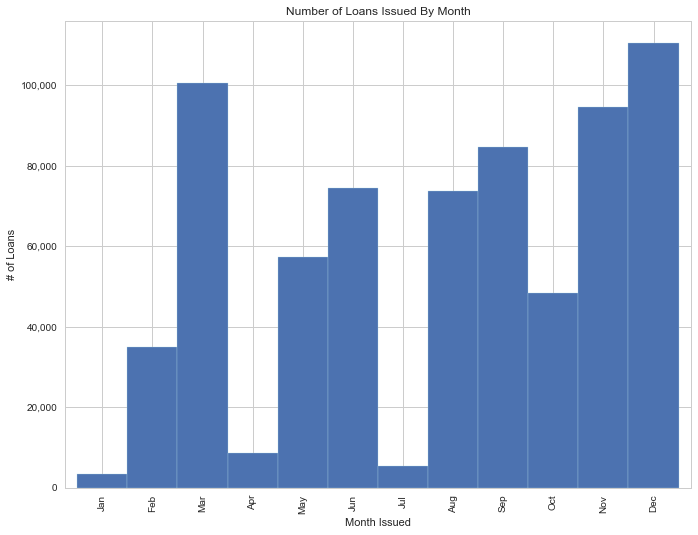

In [123]:
# we see spikes in this graphs - is there some seasonality to loans? 

# grab figure
fig, ax = plt.subplots()

# create plot
df.groupby('issue_d_month').loan_amnt.count().plot.bar(color='b',figsize=(10,8), width=1, edgecolor='lightblue')

# set labels
plt.title('Number of Loans Issued By Month')
plt.ylabel('# of Loans')
plt.xlabel('Month Issued')

# get current axis
ax = plt.gca()

# format values with comma
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# format x axis
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(len(months)), months, rotation='vertical')

fig.savefig('../reports/figures/loan_count_by_month.png')

plt.show()

**Summary**

* Since it's inception, Lending Club has increased it's loan capcity considerably.
* There appears to be a trend of loans being issued at the ending of each quarter. 

### 3.4 Explore Terms
Do terms have any diret correlation to bad loans? 

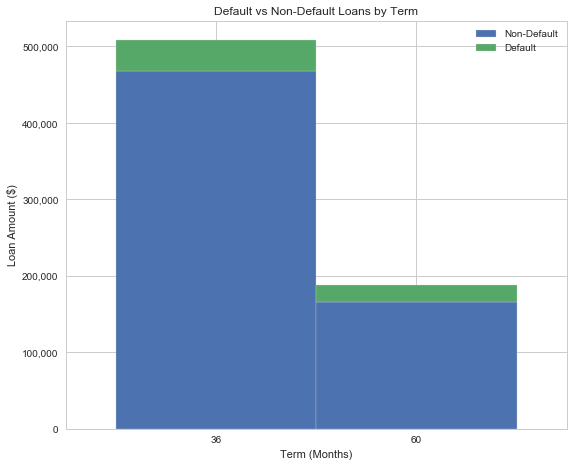

In [124]:
# create histogram
df.groupby(['term', 'is_bad']).loan_amnt.count().unstack().plot.bar(figsize=(8,7),stacked=True, width=1, edgecolor='lightgrey')

# update titles
plt.title('Default vs Non-Default Loans by Term')
plt.ylabel('Loan Amount ($)')
plt.xlabel('Term (Months)')

# setup labels
ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# create legend
leg_legend = ['Non-Default', 'Default']
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, leg_legend)
plt.xticks(rotation='horizontal')

plt.savefig('../reports/figures/terms_defaultvsnondefault.png')

plt.show()

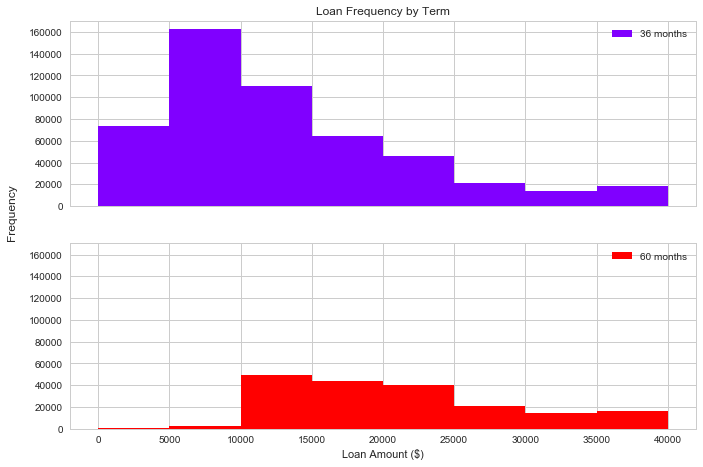

In [125]:
# what do we look like for loan amounts per term? 

term = df.term.unique()

fig, axs = plt.subplots(len(term), sharex=True,sharey=True,figsize=(10,7))

# create a colormap to represent each loan status
cm = plt.cm.rainbow
colors = cm(np.linspace(0, 1, len(term)))

bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]

for i in range(len(term)):
    line = axs[i].hist(df[df.term==term[i]].loan_amnt, bins=bins, color=colors[i], label=str(term[i])+' months')
    axs[i].legend()

# Set labels
axs[0].set_title('Loan Frequency by Term')
plt.xlabel('Loan Amount ($)')
fig.text(0., 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

fig.savefig('../reports/figures/loan_amnt_hist_by_term.png')

plt.show()

**Summary**

* Majority of loans are 36 months
* Term lenght does not appear to have an impact the default status
* It appear that larger loan sizes are more likely to have a 60 month term. 

### 3.5 Explore Grade
How do loan grades impact loan amounts & status? 

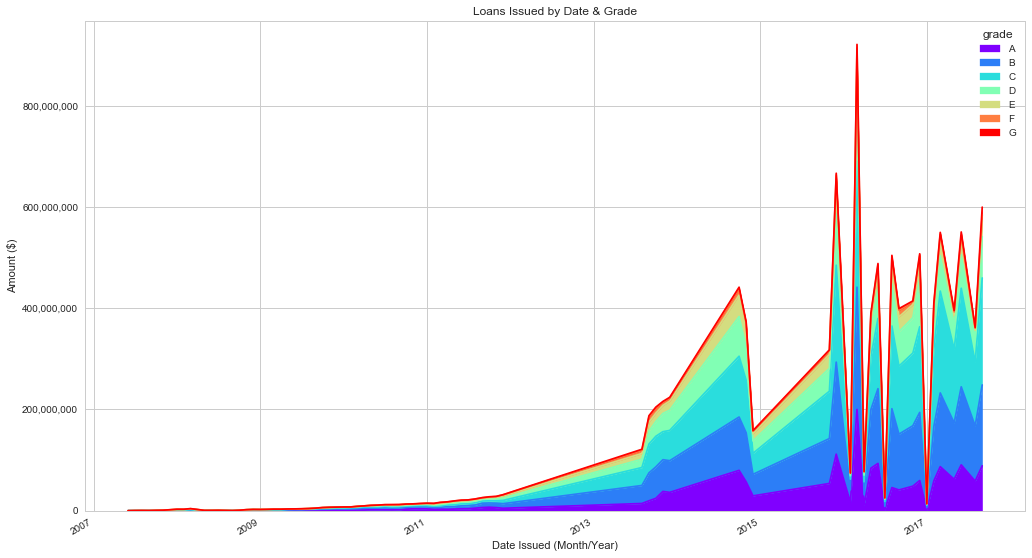

In [134]:
# find number of grades
grades = df.grade.unique()

# create a colormap to represent each grade
cm = plt.cm.rainbow
colors = cm(np.linspace(0, 1, len(grades)))

# create plot
df.groupby(['issue_d', 'grade']).loan_amnt.sum().unstack().plot.area(figsize=(15,10), color=colors)

# set labels
plt.title('Loans Issued by Date & Grade')
plt.ylabel('Amount ($)')
plt.xlabel('Date Issued (Month/Year)')

# get current axis
ax = plt.gca()

# disable scientific notation on the y axis
ax.ticklabel_format(axis='y', style='plain')

# format values with comma
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.savefig('../reports/figures/loan_amnt_by_date_grade.png')

plt.show()

In [105]:
# what does this look like percentage wise?
for group, data in df.groupby(['grade']).is_bad:
    print('Grade: {0} Bad({1:.2f}) Good({2:.2f})'.format(group, np.sum(data==1)/len(data), np.sum(data==0)/len(data)))

Grade: A Bad(0.03) Good(0.97)
Grade: B Bad(0.06) Good(0.94)
Grade: C Bad(0.09) Good(0.91)
Grade: D Bad(0.15) Good(0.85)
Grade: E Bad(0.21) Good(0.79)
Grade: F Bad(0.26) Good(0.74)
Grade: G Bad(0.25) Good(0.75)


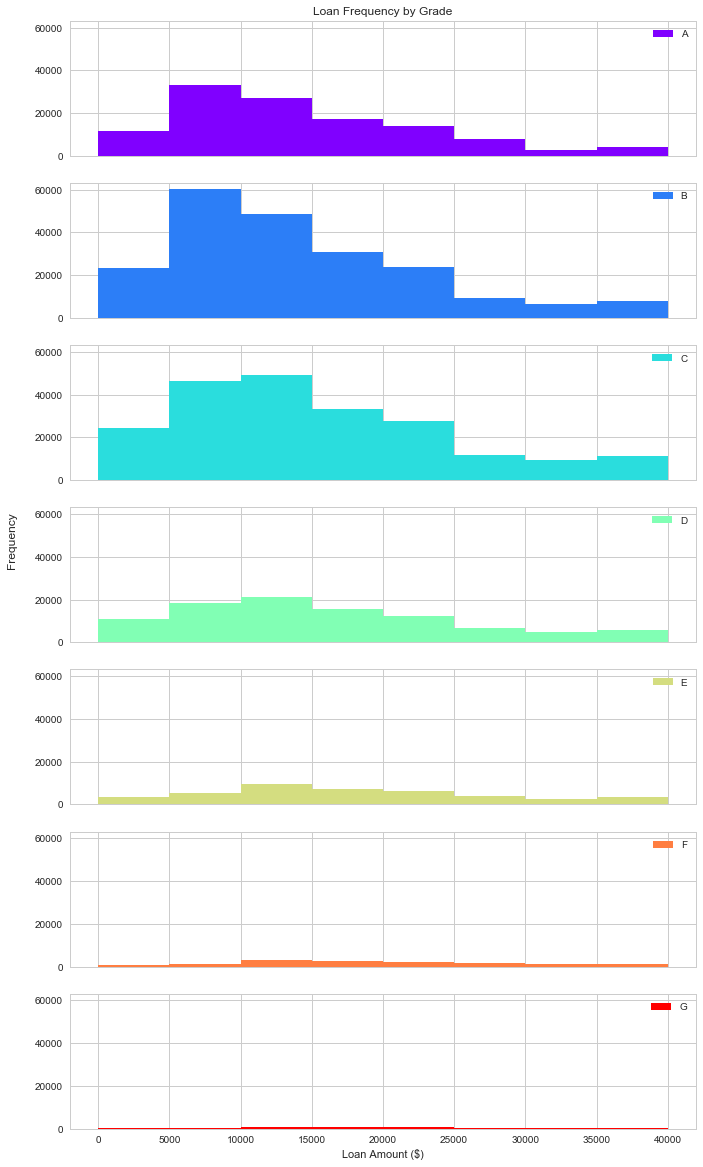

In [127]:
# what do we look like for loan amounts per grade? 

fig, axs = plt.subplots(7, sharex=True, sharey=True, figsize=(10,19))

bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]

for i, g in enumerate(sorted(grades)):
    line = axs[i].hist(df[df.grade==g].loan_amnt, bins=bins, color=colors[i], label=g)
    axs[i].legend()

# Set labels
axs[0].set_title('Loan Frequency by Grade')
plt.xlabel('Loan Amount ($)')
fig.text(0., 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

plt.savefig('../reports/figures/loan_amnt_by_grade.png')

plt.show()
    

**Summary**

* Lending club has diversified their loan grades over the years
* The lower the grade, the more likley a loan will default - Grade G(25%) vs Grade A(3%)
* Loans of grade B & C appear to be most frequent


### 3.6 Explore Interest Rates
How do interest rates impact loan amounts and deafult status?

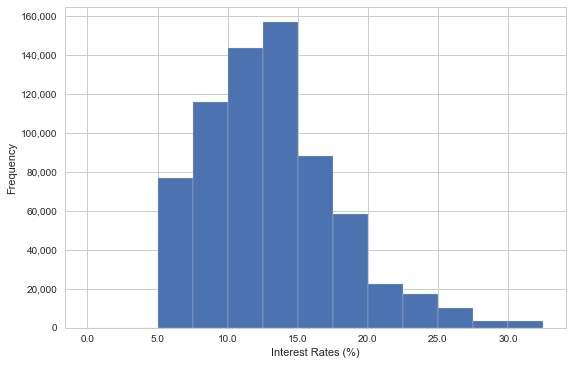

In [128]:
# setup bins
bins = np.arange(0, 35, 2.5)

# create the histogram
df.int_rate.plot.hist(bins=bins, edgecolor='lightgrey')

# set titles
plt.xlabel('Interest Rates (%)')

# setup labels
ax = plt.gca()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.savefig('../reports/figures/int_rate_hist.png')

plt.show()

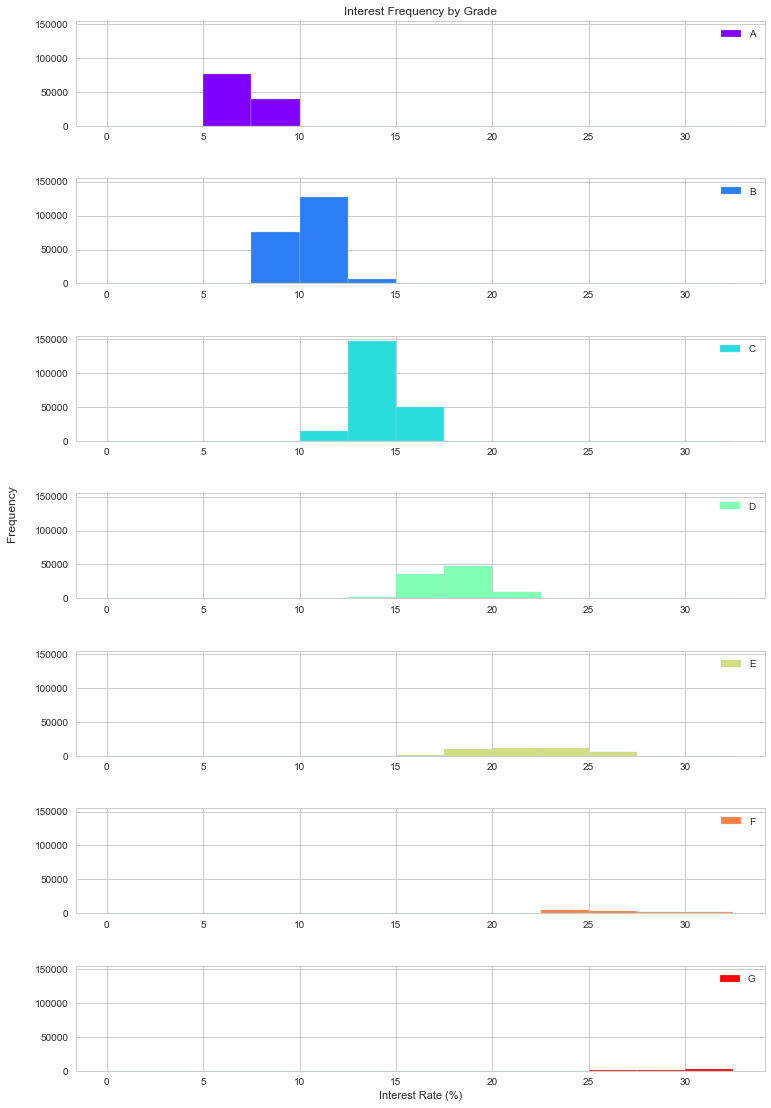

In [129]:
# what do we look like for loan amounts per grade? 
fig, axs = plt.subplots(len(grades), sharey=True, figsize=(11,18))

for i, g in enumerate(sorted(grades)):
    line = axs[i].hist(df[df.grade==g].int_rate, bins=bins, color=colors[i], label=g, edgecolor='lightblue')
    plt.xlabel('Interest Rate (%)')
    axs[i].legend()

# Set labels
axs[0].set_title('Interest Frequency by Grade')
fig.text(0., 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
plt.subplots_adjust(hspace=0.5)

plt.savefig('../reports/figures/int_rate_hist_by_grade.png')

plt.show()

In [108]:
df.int_rate.describe()

count    696997.000000
mean         13.153982
std           4.819101
min           5.320000
25%           9.750000
50%          12.620000
75%          15.610000
max          30.990000
Name: int_rate, dtype: float64

**Summary**

* Interest percentage is tightly correlated with grade - as grade decreases, interest increases 
* The mean interest rate falls within the 12.5 - 15% range.

### 3.7 Explore Home Ownership
How does home ownership play into the number of loans? 

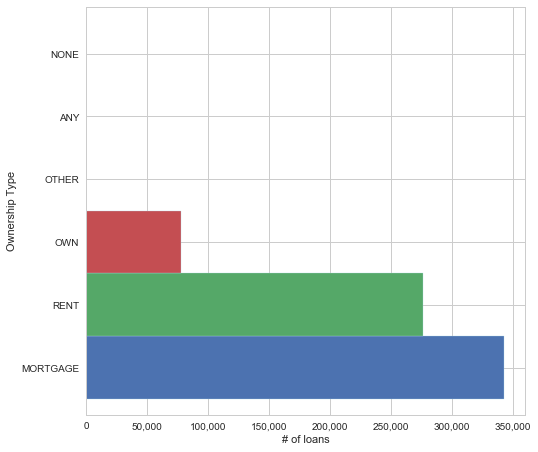

In [130]:
# create graph
df.home_ownership.value_counts().plot(kind='barh', figsize=(7, 7), width=1, edgecolor='lightblue')

# set labels
plt.xlabel('# of loans')
plt.ylabel('Ownership Type')

# get current axis
ax = plt.gca()

# format y label ticks
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

In [131]:
df.home_ownership.value_counts()

MORTGAGE    342450
RENT        276334
OWN          77939
OTHER          134
ANY            134
NONE             6
Name: home_ownership, dtype: int64

**Summary**

* We see that home ownership of 'mortgage, rent, own' make up the majority of loans

### 3.8 Explore Purpose
What are the reasons for the loans being issues? 

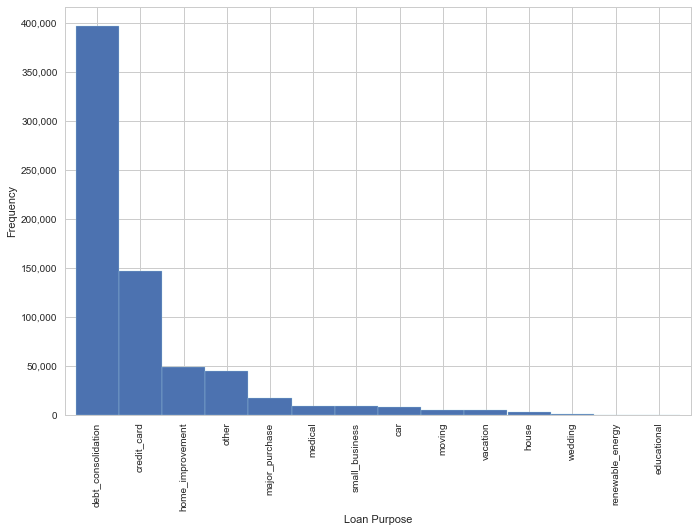

In [133]:
# create graph
df.purpose.value_counts().plot(kind='bar', color='b',figsize=(10, 7), width=1, edgecolor='lightblue')

# set labels
plt.xlabel('Loan Purpose')
plt.ylabel('Frequency')

# get current axis
ax = plt.gca()

# format y label ticks
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.savefig('../reports/figures/loan_purpose_hist.png')

plt.show()

In [372]:
# Do we know what types of loans have the best chance of being repaid? 

loans = []

for p in df.purpose.unique():
    good = np.sum([(df.purpose==p) & (df.is_bad==0)]) / np.sum(df.purpose==p)
    bad = np.sum([(df.purpose==p) & (df.is_bad==1)]) / np.sum(df.purpose==p)

    loans.append([p, good, bad])

loans = pd.DataFrame(loans)
loans.columns = ['Purpose', 'Non-default', 'Default']
loans.set_index('Purpose', inplace=True)
loans.sort_values('Non-default')

,Non-default,Default
Purpose,,
educational,0.789976,0.210024
small_business,0.832168,0.167832
renewable_energy,0.862004,0.137996
moving,0.889097,0.110903
wedding,0.893011,0.106989
house,0.895964,0.104036
medical,0.898824,0.101176
debt_consolidation,0.903623,0.096377
other,0.906311,0.093689


**Summary**
* Majority of loans are for paying debt consoildation
* Loans for the purpose of credit card, car, home imporovements have the best chances for repayment
* Loans for educational purposes have the worst repayment perecentage

### 3.9 Explore By State
Where are the majority of loans being issued?

In [373]:
import folium
import json
import os

# create dataframe for loan amount grouped by state
df_amnt_by_state = df[['addr_state', 'loan_amnt']].groupby('addr_state').sum().reset_index()

# scale amounts by 10's of millions
dic_amnt_by_state = df_amnt_by_state.set_index('addr_state').loan_amnt / 10000000


In [374]:
import branca.colormap as cm

# create a color scale
linear = cm.linear.OrRd.to_step(8).scale(
    dic_amnt_by_state.min(), 
    dic_amnt_by_state.max())

linear

In [375]:
# create the map
m = folium.Map(location=[48, -102], zoom_start=4)

# load the geojson of the US states
geo_json_data = json.load(open('../data/external/us_states.json'))

# add the geojson to the map
folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': linear(dic_amnt_by_state.loc[feature['id']]),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.8}
).add_to(m)

# add the scale
linear.caption = 'Loan Amounts (100s of Millions)'
m.add_child(linear)

# show the map
m

**Summary**
* largest number of loans are provided in California, new york, texas & florida 

## 4. Null Values

Before moving on, we need to address missing values within our dataset.  Digging into some of the missing data, we find that a handful of columns were missing in the dataset prior to 2012 - as a result, we see all loans prior to 2012 having null data for these columns. 

In [376]:
# look at dates for the given records missing values
df[df.num_bc_sats.isnull()]['issue_d'].value_counts()

2011-12-01    2267
2011-11-01    2230
2011-10-01    2117
2011-09-01    2067
2011-08-01    1934
2011-07-01    1872
2011-06-01    1834
2011-05-01    1704
2011-04-01    1563
2011-03-01    1446
2011-01-01    1380
2010-12-01    1334
2011-02-01    1298
2010-10-01    1228
2010-11-01    1224
2010-07-01    1203
2010-09-01    1188
2010-08-01    1172
2010-06-01    1099
2010-05-01     989
2010-04-01     912
2010-03-01     826
2010-02-01     681
2010-01-01     660
2009-11-01     660
2009-12-01     656
2009-10-01     603
2009-09-01     507
2009-08-01     446
2009-07-01     410
2009-06-01     404
2008-03-01     398
2009-05-01     358
2009-04-01     331
2009-03-01     323
2008-02-01     306
2008-01-01     305
2009-02-01     301
2009-01-01     266
2008-04-01     257
2008-12-01     252
2008-11-01     208
2007-12-01     172
2008-07-01     139
2008-06-01     123
2008-10-01     122
2008-05-01     115
2007-11-01     112
2007-10-01     105
2008-08-01      99
2007-08-01      68
2007-07-01      58
2008-09-01  

In [377]:
# I'd rater not drop 5 years worth of data.  As a result, we will try to fill NA values 
# with the means for each column

# identify the column names introduce after 2012
missing_data_impute_mean = ['tot_coll_amt',
                'tot_cur_bal',
                'total_rev_hi_lim',
                'acc_open_past_24mths',
                'avg_cur_bal',
                'mo_sin_old_rev_tl_op',
                'mo_sin_rcnt_rev_tl_op',
                'mo_sin_rcnt_tl',
                'mort_acc',
                'num_accts_ever_120_pd',
                'num_actv_bc_tl',
                'num_actv_rev_tl',
                'num_bc_sats',
                'num_bc_tl',
                'num_il_tl',
                'num_op_rev_tl',
                'num_rev_accts',
                'num_rev_tl_bal_gt_0',
                'num_sats',
                'num_tl_30dpd',
                'num_tl_90g_dpd_24m',
                'num_tl_op_past_12m',
                'tot_hi_cred_lim',
                'total_bal_ex_mort',
                'total_bc_limit',
                'total_il_high_credit_limit']

# impute the mean
for c in missing_data_impute_mean:
    df[c] = df[c].fillna(value=int(df[c].mean()))

In [378]:
# we have another handful of column missing 7-8% of data.  Instead of imputing the mean within these column, we are
# simply going to drop the columns as to not introduce bias and reduce variance. 
missing_data_drop_cols = ['bc_open_to_buy',
                'bc_util', 
                'mo_sin_old_il_acct',
                'mths_since_recent_bc',
                'pct_tl_nvr_dlq',
                'percent_bc_gt_75']

for c in missing_data_drop_cols:
    print('{}: {}'.format(c, np.sum(df[c].isnull()) / len(df[c])))

bc_open_to_buy: 0.07079513972083093
bc_util: 0.07117677694452057
mo_sin_old_il_acct: 0.08778086562782911
mths_since_recent_bc: 0.07019255463079468
pct_tl_nvr_dlq: 0.06111647539372479
percent_bc_gt_75: 0.07092569982367213


In [379]:
# drop missing columns
df = df.drop(missing_data_drop_cols, axis=1)

In [380]:
# we have another few columns missing 0-1% of data.  Instead of imputing the data within these columns, I will 
# simply drop the rows having NA present

missing_data_drop_rows = ['dti',
                'collections_12_mths_ex_med',
                'chargeoff_within_12_mths',
                'pub_rec_bankruptcies',
                'tax_liens']

# show calculation of missing data
for c in missing_cols:
    print('{}: {}'.format(c, np.sum(df[c].isnull()) / len(df[c])))

dti: 0.0003428996107587264
collections_12_mths_ex_med: 0.0001621240837478497
chargeoff_within_12_mths: 0.0001621240837478497
pub_rec_bankruptcies: 0.0019124902976626872
tax_liens: 0.00010760448036361706


In [381]:
# drop rows having missing data
df = df.dropna(subset=missing_data_drop_rows, axis=0, how='any')

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695420 entries, 0 to 65498
Data columns (total 77 columns):
loan_amnt                     695420 non-null float64
funded_amnt                   695420 non-null float64
funded_amnt_inv               695420 non-null float64
term                          695420 non-null int64
int_rate                      695420 non-null float64
installment                   695420 non-null float64
grade                         695420 non-null category
sub_grade                     695420 non-null category
emp_length                    695420 non-null int64
home_ownership                695420 non-null category
annual_inc                    695420 non-null float64
verification_status           695420 non-null category
issue_d                       695420 non-null datetime64[ns]
loan_status                   695420 non-null category
purpose                       695420 non-null category
zip_code                      695420 non-null category
addr_state      

## 4. Correlation
Let's see how our variables are related

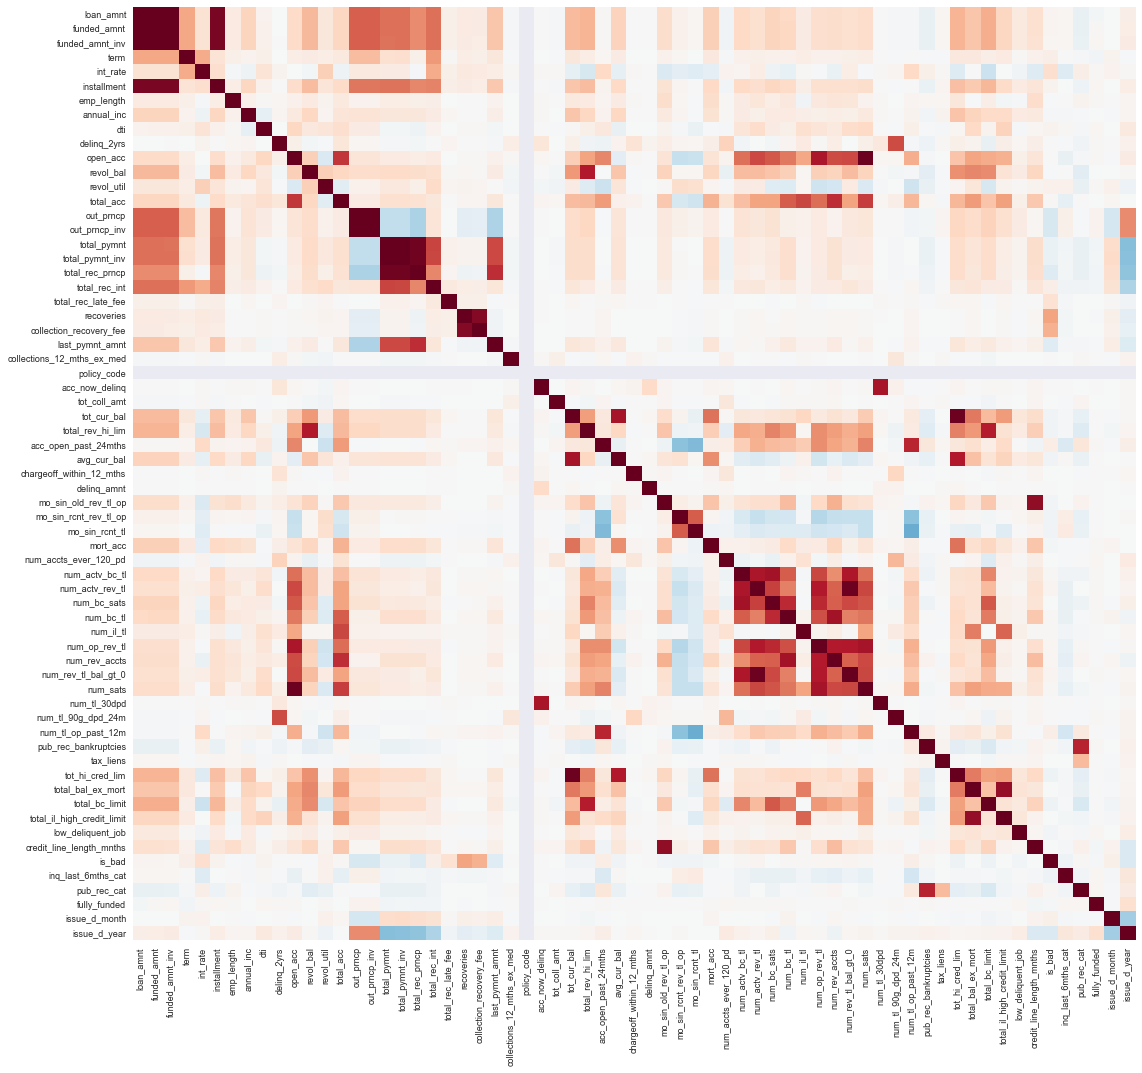

In [383]:
sns.set(font_scale=.9)
fig, ax = plt.subplots(figsize=(16,16))         # Sample figsize in inches
sns.heatmap(df.corr(), cbar=False)
plt.show()

**Summary**

We see some correlation between 'is_bad' and -
* int_rate
* out_princp
* out_princp_inv
* total_rec_princp
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_amnt
* issue_year

The following columns have been determined to bring little to no value to our model and will be removed:

* issue_d
    * This is a date feature, which cannot be used in classification.

* policy_code (1)
    * The same value (1) occurs for every record.

* zip_code
    * We are going to utlize the state for this analysis


In [384]:
## Delete columns
del_cols = ['issue_d',
            'policy_code',
            'zip_code']

df.drop(del_cols, axis=1, inplace=True)

## 5. Export
Let's export our dataframe to a CSV so that we have a fresh dataset to begin out model building

In [385]:
# export to csv
df.to_csv('./../data/processed/LCdata_processed.csv')